First Problem - Exercise Recognition

In [3]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import matplotlib.patches as patches

import xgboost as xgb

In [4]:
X_train = joblib.load("Data/Xtrain1.pkl")
Y_train = np.load('Data/Ytrain1.npy')
print(X_train.shape)
print(Y_train.shape)

(700, 2)
(700,)


In [5]:
print(X_train)

     Patient_Id                                  Skeleton_Features
158           8  [0.01672805172463768, -0.5662699523188407, 0.0...
500          12  [0.03123780159177354, -0.5718956396, 0.0479631...
396           6  [0.023674554394231464, -0.5588386275217391, 0....
155           8  [0.009414516641025642, -0.5693782186153847, 0....
321           3  [0.015847331331651126, -0.5660038876666666, 0....
..          ...                                                ...
71            4  [0.00865563444, -0.5576752849466667, 0.0242797...
106           6  [0.017996815525, -0.5546415622, 0.032668157291...
270          14  [-0.06093925460784313, -0.5421445670294118, -0...
435           8  [-0.009460545267441861, -0.5828924643604652, 0...
102           6  [0.014680226106557379, -0.5484173288196722, 0....

[700 rows x 2 columns]


In [6]:
patient_ids = X_train["Patient_Id"].values
X_train = np.vstack(X_train["Skeleton_Features"].values)

In [7]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)  
print("patient_ids shape:", patient_ids.shape) 

X_train shape: (700, 132)
Y_train shape: (700,)
patient_ids shape: (700,)


In [8]:
connections = {
    'trunk': [(11, 12), (11, 23), (12, 24), (23, 24)],
    'right_arm': [(12, 14), (14, 16), (22, 16), (20, 16), (20, 18), (18, 16)],
    'left_arm': [(11, 13), (13, 15), (21, 15), (15, 19), (19, 17), (17, 15)],
    'right_leg': [(23, 25), (25, 27), (27, 31), (31, 29), (29, 27)],
    'left_leg': [(24, 26), (26, 28), (28, 30), (30, 32), (28, 32)]
}

colors = {
    'trunk': 'blue',
    'right_arm': 'red',
    'left_arm': 'green',
    'right_leg': 'orange',
    'left_leg': 'purple'
}

head_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

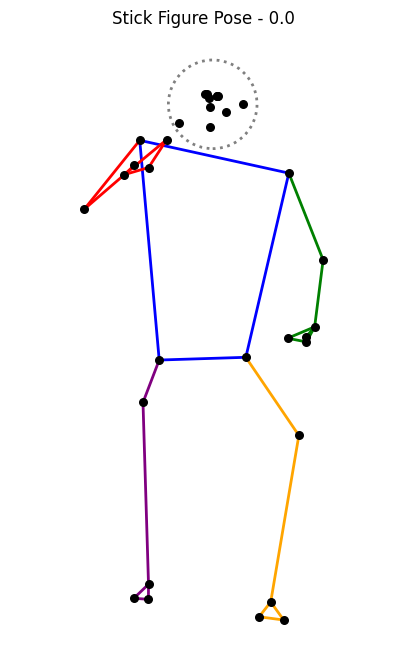

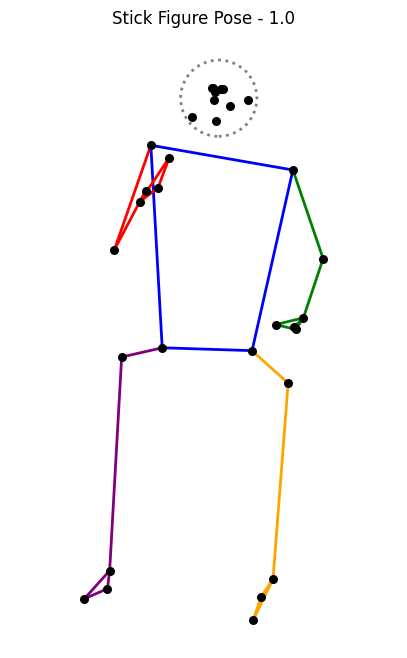

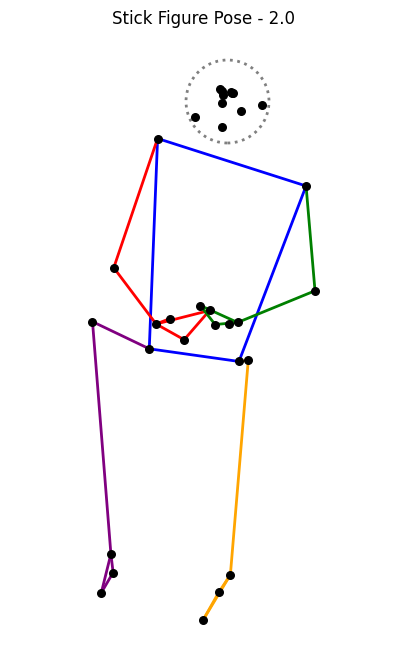

In [ ]:
examples = [0, 4, 10]

for idx in examples:
    sample = X_train[idx]

    # Split into mean and std
    mean_coords = sample[:66]
    std_coords = sample[66:]

    # Extract x and y of 33 keypoints
    x = mean_coords[0::2]  # even indices
    y = mean_coords[1::2]  # odd indices

    # Get head points
    head_x = x[head_indices]
    head_y = -y[head_indices]  # use -y if you invert y in your plot

    # Calculate center as mean of head points
    center_x = head_x.mean()
    center_y = head_y.mean()

    # Calculate radius as max distance from center to any head point
    radius = np.max(np.sqrt((head_x - center_x)**2 + (head_y - center_y)**2)) * 1.15  # 1.15 for padding

    fig, ax = plt.subplots(figsize=(5, 8))

    # Plot segments
    for part, segs in connections.items():
        for a, b in segs:
            ax.plot([x[a], x[b]], [-y[a], -y[b]], c=colors[part], lw=2)

    # Plot joints
    ax.scatter(x, -y, c='black', s=30, zorder=2)

    # Draw head circle
    circle = patches.Circle((center_x, center_y), radius, fill=False, linestyle='dotted', edgecolor='gray', lw=2)
    ax.add_patch(circle)

    ax.set_title(f"Stick Figure Pose - {Y_train[idx]}")
    ax.axis('equal')
    ax.axis('off')
    plt.show()

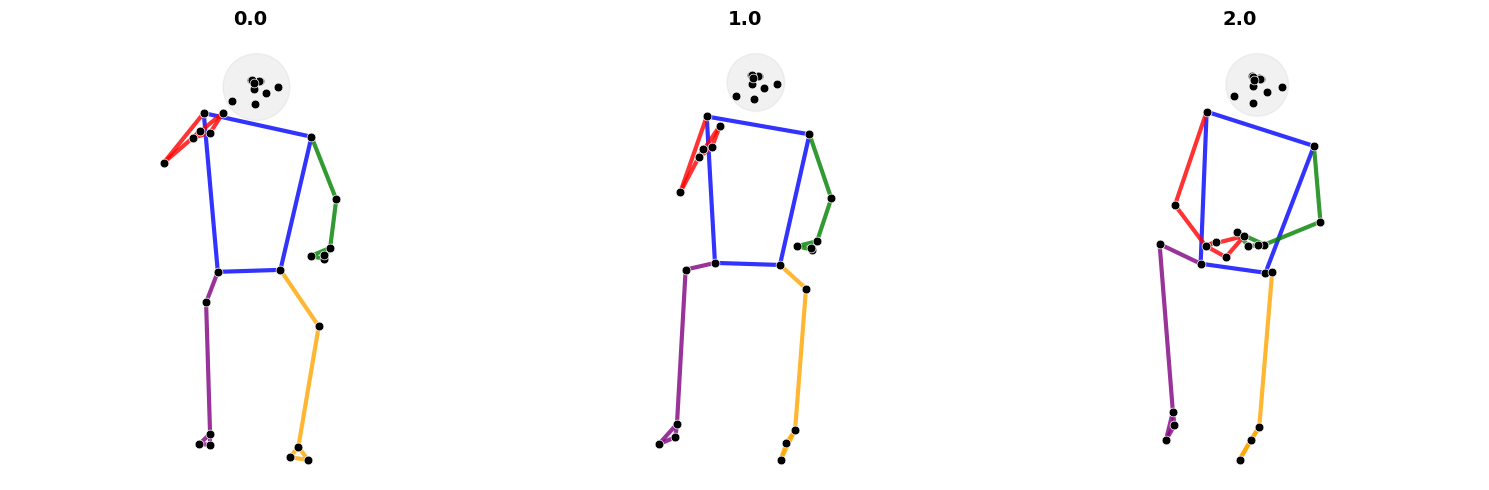

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_skeletons(samples, labels, connections, colors, head_indices, figsize=(12,5)):
    n = len(samples)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    if n == 1:
        axes = [axes]  # garante lista mesmo para 1 figura

    for ax, sample, label in zip(axes, samples, labels):
        mean_coords = sample[:66]
        x = mean_coords[0::2]
        y = mean_coords[1::2]

        # Head circle
        head_x = x[head_indices]
        head_y = -y[head_indices]
        center_x, center_y = head_x.mean(), head_y.mean()
        radius = np.max(np.sqrt((head_x - center_x)**2 + (head_y - center_y)**2)) * 1.2

        # Plot segments com cores e transparência
        for part, segs in connections.items():
            for a, b in segs:
                ax.plot([x[a], x[b]], [-y[a], -y[b]], c=colors.get(part,'#1f77b4'), lw=3, alpha=0.8)

        # Plot joints
        ax.scatter(x, -y, c='black', s=40, zorder=3, edgecolors='white', linewidth=0.5)

        # Head preenchida semi-transparente
        circle = patches.Circle((center_x, center_y), radius, fill=True, color='lightgray', alpha=0.3)
        ax.add_patch(circle)

        # Estilo do eixo
        ax.set_title(f"{label}", fontsize=14, fontweight='bold')
        ax.axis('equal')
        ax.axis('off')
        ax.set_facecolor('#f9f9f9')

    plt.tight_layout()
    plt.show()


examples = [0, 4, 10]
plot_skeletons(
    samples=[X_train[i] for i in examples],
    labels=[Y_train[i] for i in examples],
    connections=connections,
    colors=colors,
    head_indices=head_indices,
    figsize=(15,5)
)


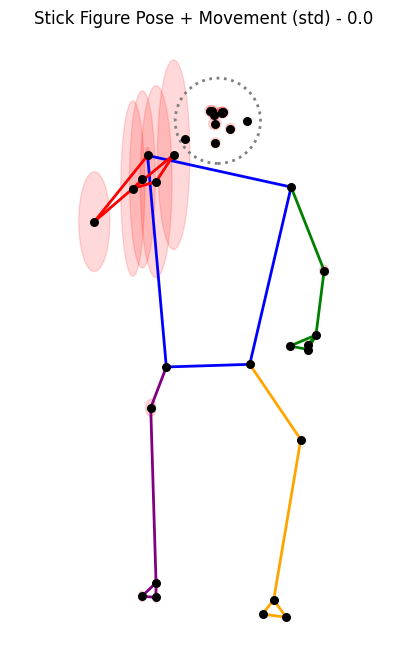

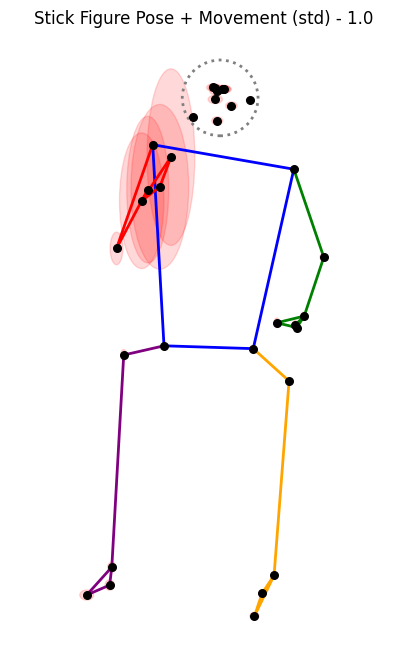

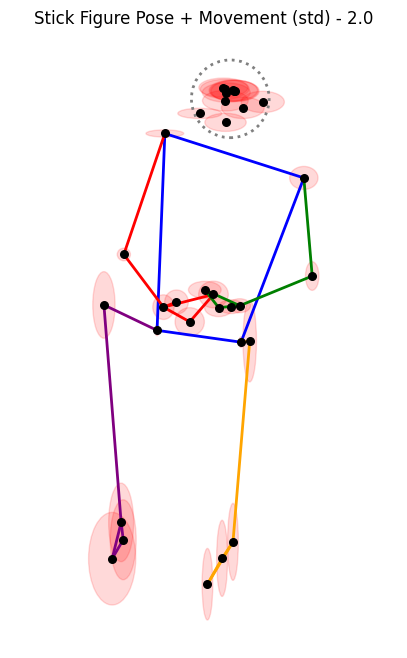

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

examples = [0, 4, 10]

for idx in examples:
    sample = X_train[idx]

    # Divide em média e desvio
    mean_coords = sample[:66]
    std_coords = sample[66:]

    x = mean_coords[0::2]
    y = mean_coords[1::2]
    x_std = std_coords[0::2]
    y_std = std_coords[1::2]

    # Calcular cabeça
    head_x = x[head_indices]
    head_y = -y[head_indices]
    center_x = head_x.mean()
    center_y = head_y.mean()
    radius = np.max(np.sqrt((head_x - center_x)**2 + (head_y - center_y)**2)) * 1.15

    fig, ax = plt.subplots(figsize=(5, 8))

    # --- Desenhar segmentos (mean) ---
    for part, segs in connections.items():
        for a, b in segs:
            ax.plot([x[a], x[b]], [-y[a], -y[b]], c=colors[part], lw=2)

    # --- Juntas principais ---
    ax.scatter(x, -y, c='black', s=30, zorder=3, label='Mean Position')

    # --- Desenhar elipses de incerteza (std) ---
    for i in range(len(x)):
        ellipse = patches.Ellipse(
            (x[i], -y[i]),            # centro
            width=x_std[i]*2,         # largura = 2*desvio
            height=y_std[i]*2,        # altura = 2*desvio
            edgecolor='red',
            facecolor='red',
            alpha=0.15,
            lw=1
        )
        ax.add_patch(ellipse)

    # --- Círculo da cabeça ---
    circle = patches.Circle((center_x, center_y), radius,
                            fill=False, linestyle='dotted', edgecolor='gray', lw=2)
    ax.add_patch(circle)

    ax.set_title(f"Stick Figure Pose + Movement (std) - {Y_train[idx]}")
    ax.axis('equal')
    ax.axis('off')
    plt.show()


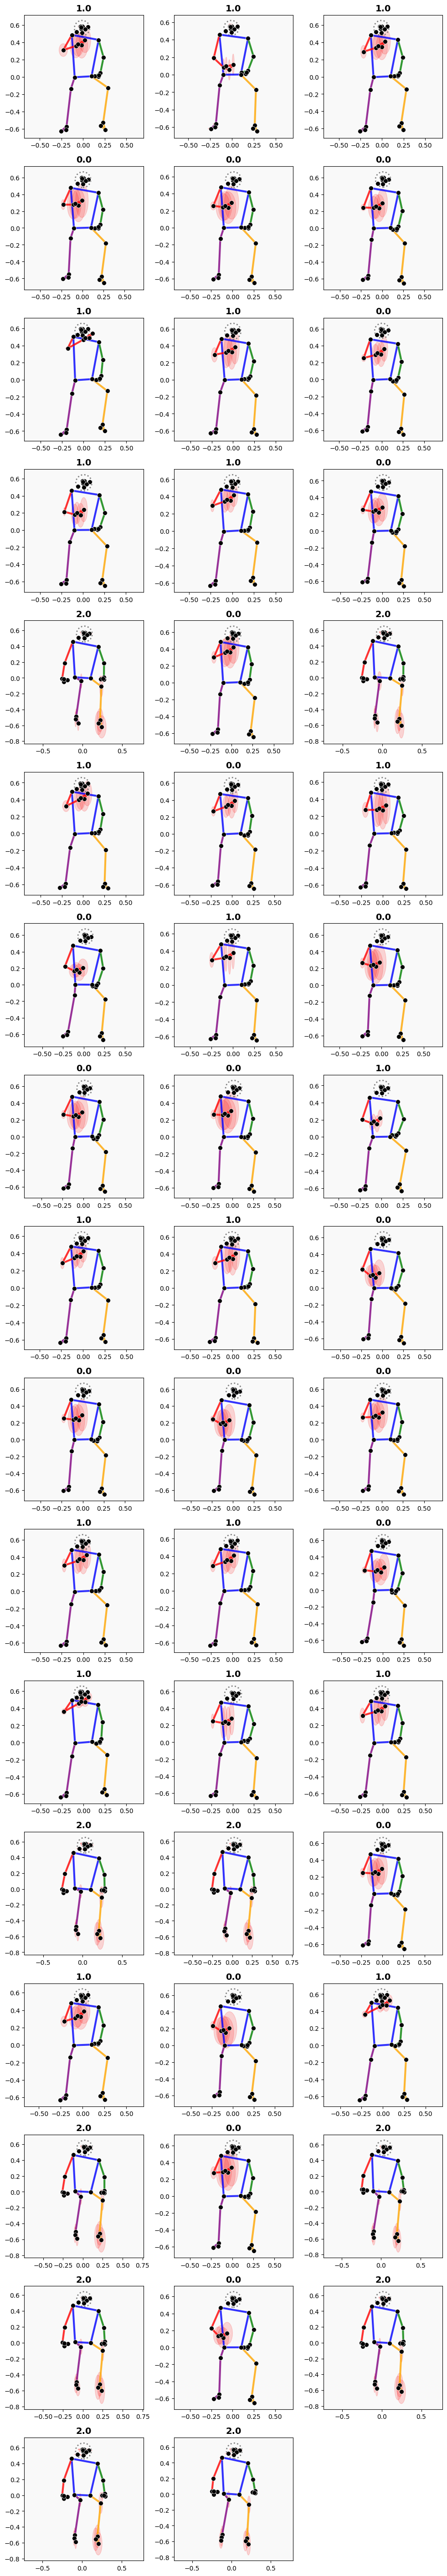

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

def plot_skeletons_mean_std(samples, labels, connections, colors, head_indices,
                            figsize=(15,5), alpha_std=0.2, joint_size=40, lw_seg=2,
                            cols=3):
    
    n = len(samples)
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1] * rows / cols))
    axes = np.array(axes).reshape(-1)  # flatten em 1D para indexar facilmente

    for ax in axes:
        ax.axis('off')  # desliga todos, depois ligamos só os usados

    for ax, sample, label in zip(axes, samples, labels):
        mean_coords = sample[:66]
        std_coords = sample[66:]

        x = mean_coords[0::2]
        y = mean_coords[1::2]
        x_std = std_coords[0::2]
        y_std = std_coords[1::2]

        # Círculo da cabeça
        head_x = x[head_indices]
        head_y = -y[head_indices]
        center_x, center_y = head_x.mean(), head_y.mean()
        radius = np.max(np.sqrt((head_x - center_x)**2 + (head_y - center_y)**2)) * 1.15

        # Fundo suave
        ax.set_facecolor('#f9f9f9')

        # --- Desenhar segmentos ---
        for part, segs in connections.items():
            for a, b in segs:
                ax.plot([x[a], x[b]], [-y[a], -y[b]],
                        c=colors.get(part,'#1f77b4'),
                        lw=lw_seg, alpha=0.8)

        # --- Juntas (mean) ---
        ax.scatter(x, -y, c='black', s=joint_size, zorder=3, edgecolors='white', linewidth=0.5)

        # --- Elipses de incerteza (std) ---
        for i in range(len(x)):
            ellipse = patches.Ellipse(
                (x[i], -y[i]),
                width=x_std[i]*2,
                height=y_std[i]*2,
                edgecolor='red',
                facecolor='red',
                alpha=alpha_std,
                lw=1
            )
            ax.add_patch(ellipse)

        # --- Círculo da cabeça ---
        circle = patches.Circle(
            (center_x, center_y),
            radius,
            fill=False,
            linestyle='dotted',
            edgecolor='gray',
            lw=2
        )
        ax.add_patch(circle)

        # --- Ajustes finais ---
        ax.set_title(f"{label}", fontsize=14, fontweight='bold')
        ax.axis('equal')
        ax.axis('on')

    plt.tight_layout()
    plt.show()


# Escolher o paciente que quer visualizar
patient_id = 1

# Obter os índices das amostras pertencentes a esse paciente
indices = np.where(patient_ids == patient_id)[0]

# Plotar os esqueletos de todas as amostras desse paciente
plot_skeletons_mean_std(
    samples=[X_train[i] for i in indices],
    labels=[Y_train[i] for i in indices],
    connections=connections,
    colors=colors,
    head_indices=head_indices,
    figsize=(10,10),
    alpha_std=0.15,
    joint_size=50,
    lw_seg=3
)



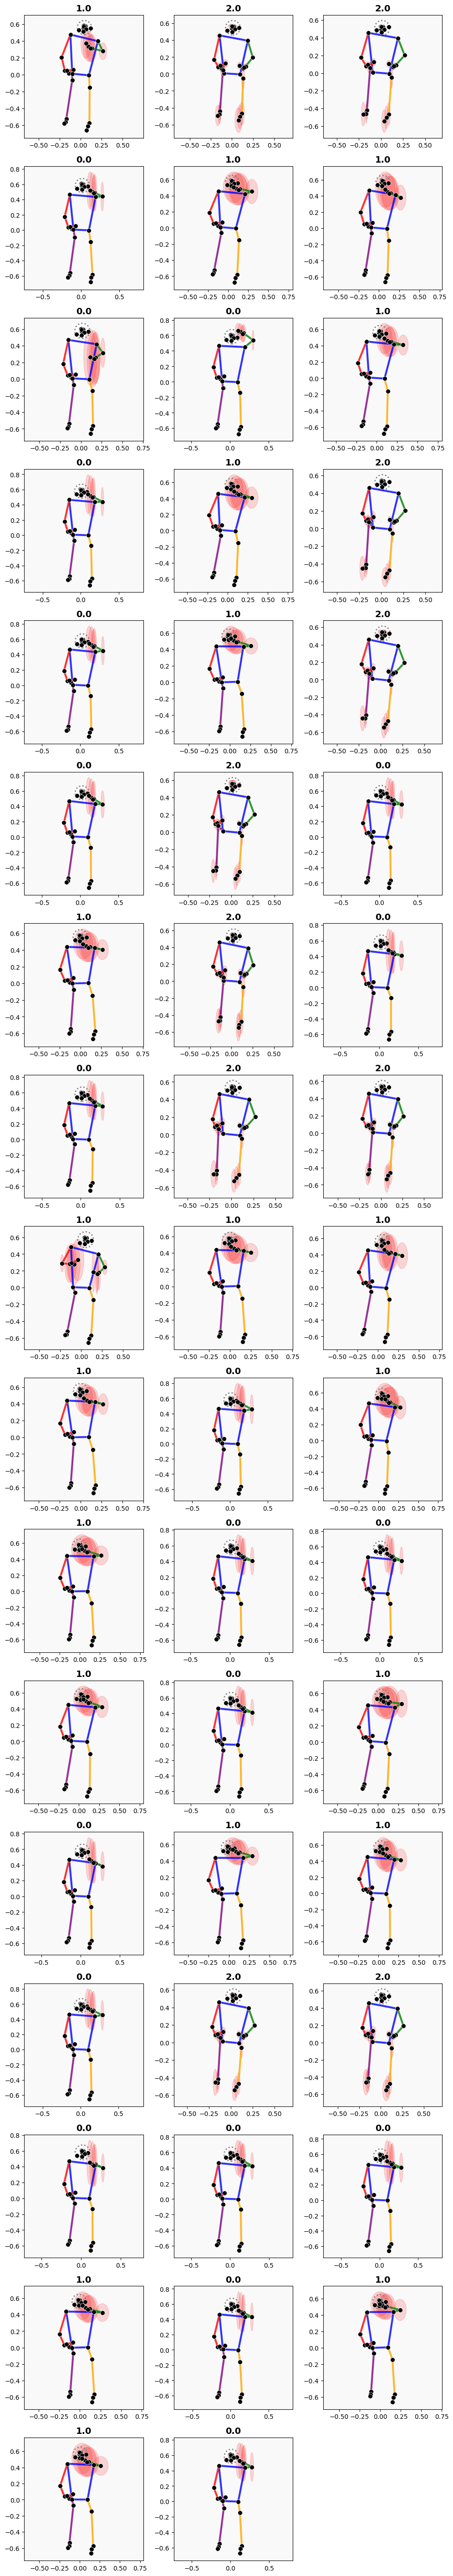

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

def plot_skeletons_mean_std(samples, labels, connections, colors, head_indices,
                            figsize=(15,5), alpha_std=0.2, joint_size=40, lw_seg=2,
                            cols=3):
    
    n = len(samples)
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1] * rows / cols))
    axes = np.array(axes).reshape(-1)  # flatten em 1D para indexar facilmente

    for ax in axes:
        ax.axis('off')  # desliga todos, depois ligamos só os usados

    for ax, sample, label in zip(axes, samples, labels):
        mean_coords = sample[:66]
        std_coords = sample[66:]

        x = mean_coords[0::2]
        y = mean_coords[1::2]
        x_std = std_coords[0::2]
        y_std = std_coords[1::2]

        # Círculo da cabeça
        head_x = x[head_indices]
        head_y = -y[head_indices]
        center_x, center_y = head_x.mean(), head_y.mean()
        radius = np.max(np.sqrt((head_x - center_x)**2 + (head_y - center_y)**2)) * 1.15

        # Fundo suave
        ax.set_facecolor('#f9f9f9')

        # --- Desenhar segmentos ---
        for part, segs in connections.items():
            for a, b in segs:
                ax.plot([x[a], x[b]], [-y[a], -y[b]],
                        c=colors.get(part,'#1f77b4'),
                        lw=lw_seg, alpha=0.8)

        # --- Juntas (mean) ---
        ax.scatter(x, -y, c='black', s=joint_size, zorder=3, edgecolors='white', linewidth=0.5)

        # --- Elipses de incerteza (std) ---
        for i in range(len(x)):
            ellipse = patches.Ellipse(
                (x[i], -y[i]),
                width=x_std[i]*2,
                height=y_std[i]*2,
                edgecolor='red',
                facecolor='red',
                alpha=alpha_std,
                lw=1
            )
            ax.add_patch(ellipse)

        # --- Círculo da cabeça ---
        circle = patches.Circle(
            (center_x, center_y),
            radius,
            fill=False,
            linestyle='dotted',
            edgecolor='gray',
            lw=2
        )
        ax.add_patch(circle)

        # --- Ajustes finais ---
        ax.set_title(f"{label}", fontsize=14, fontweight='bold')
        ax.axis('equal')
        ax.axis('on')

    plt.tight_layout()
    plt.show()


# Escolher o paciente que quer visualizar
patient_id = 2

# Obter os índices das amostras pertencentes a esse paciente
indices = np.where(patient_ids == patient_id)[0]

# Plotar os esqueletos de todas as amostras desse paciente
plot_skeletons_mean_std(
    samples=[X_train[i] for i in indices],
    labels=[Y_train[i] for i in indices],
    connections=connections,
    colors=colors,
    head_indices=head_indices,
    figsize=(10,10),
    alpha_std=0.15,
    joint_size=50,
    lw_seg=3
)



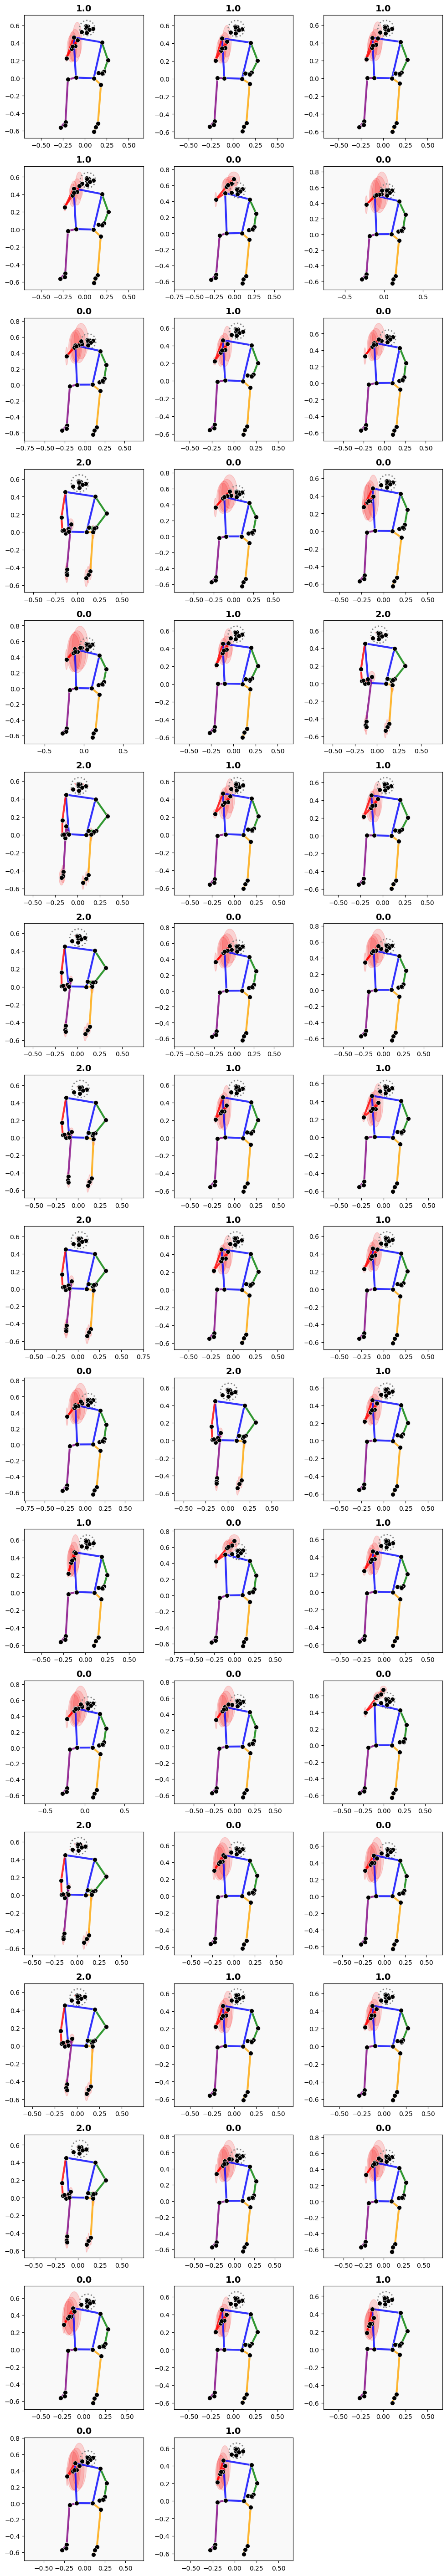

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

def plot_skeletons_mean_std(samples, labels, connections, colors, head_indices,
                            figsize=(15,5), alpha_std=0.2, joint_size=40, lw_seg=2,
                            cols=3):
    
    n = len(samples)
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1] * rows / cols))
    axes = np.array(axes).reshape(-1)  # flatten em 1D para indexar facilmente

    for ax in axes:
        ax.axis('off')  # desliga todos, depois ligamos só os usados

    for ax, sample, label in zip(axes, samples, labels):
        mean_coords = sample[:66]
        std_coords = sample[66:]

        x = mean_coords[0::2]
        y = mean_coords[1::2]
        x_std = std_coords[0::2]
        y_std = std_coords[1::2]

        # Círculo da cabeça
        head_x = x[head_indices]
        head_y = -y[head_indices]
        center_x, center_y = head_x.mean(), head_y.mean()
        radius = np.max(np.sqrt((head_x - center_x)**2 + (head_y - center_y)**2)) * 1.15

        # Fundo suave
        ax.set_facecolor('#f9f9f9')

        # --- Desenhar segmentos ---
        for part, segs in connections.items():
            for a, b in segs:
                ax.plot([x[a], x[b]], [-y[a], -y[b]],
                        c=colors.get(part,'#1f77b4'),
                        lw=lw_seg, alpha=0.8)

        # --- Juntas (mean) ---
        ax.scatter(x, -y, c='black', s=joint_size, zorder=3, edgecolors='white', linewidth=0.5)

        # --- Elipses de incerteza (std) ---
        for i in range(len(x)):
            ellipse = patches.Ellipse(
                (x[i], -y[i]),
                width=x_std[i]*2,
                height=y_std[i]*2,
                edgecolor='red',
                facecolor='red',
                alpha=alpha_std,
                lw=1
            )
            ax.add_patch(ellipse)

        # --- Círculo da cabeça ---
        circle = patches.Circle(
            (center_x, center_y),
            radius,
            fill=False,
            linestyle='dotted',
            edgecolor='gray',
            lw=2
        )
        ax.add_patch(circle)

        # --- Ajustes finais ---
        ax.set_title(f"{label}", fontsize=14, fontweight='bold')
        ax.axis('equal')
        ax.axis('on')

    plt.tight_layout()
    plt.show()


# Escolher o paciente que quer visualizar
patient_id = 3

# Obter os índices das amostras pertencentes a esse paciente
indices = np.where(patient_ids == patient_id)[0]

# Plotar os esqueletos de todas as amostras desse paciente
plot_skeletons_mean_std(
    samples=[X_train[i] for i in indices],
    labels=[Y_train[i] for i in indices],
    connections=connections,
    colors=colors,
    head_indices=head_indices,
    figsize=(10,10),
    alpha_std=0.15,
    joint_size=50,
    lw_seg=3
)



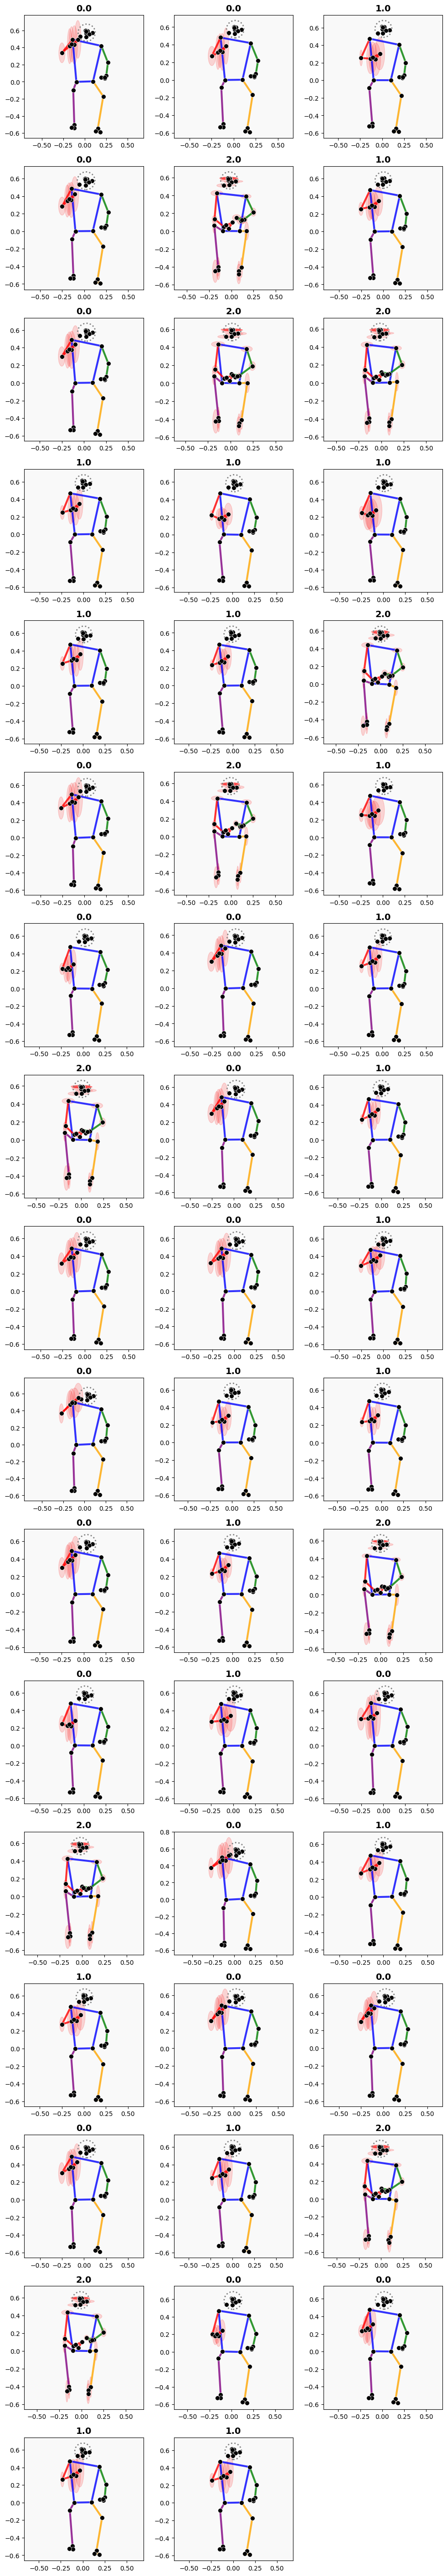

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

def plot_skeletons_mean_std(samples, labels, connections, colors, head_indices,
                            figsize=(15,5), alpha_std=0.2, joint_size=40, lw_seg=2,
                            cols=3):
    
    n = len(samples)
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1] * rows / cols))
    axes = np.array(axes).reshape(-1)  # flatten em 1D para indexar facilmente

    for ax in axes:
        ax.axis('off')  # desliga todos, depois ligamos só os usados

    for ax, sample, label in zip(axes, samples, labels):
        mean_coords = sample[:66]
        std_coords = sample[66:]

        x = mean_coords[0::2]
        y = mean_coords[1::2]
        x_std = std_coords[0::2]
        y_std = std_coords[1::2]

        # Círculo da cabeça
        head_x = x[head_indices]
        head_y = -y[head_indices]
        center_x, center_y = head_x.mean(), head_y.mean()
        radius = np.max(np.sqrt((head_x - center_x)**2 + (head_y - center_y)**2)) * 1.15

        # Fundo suave
        ax.set_facecolor('#f9f9f9')

        # --- Desenhar segmentos ---
        for part, segs in connections.items():
            for a, b in segs:
                ax.plot([x[a], x[b]], [-y[a], -y[b]],
                        c=colors.get(part,'#1f77b4'),
                        lw=lw_seg, alpha=0.8)

        # --- Juntas (mean) ---
        ax.scatter(x, -y, c='black', s=joint_size, zorder=3, edgecolors='white', linewidth=0.5)

        # --- Elipses de incerteza (std) ---
        for i in range(len(x)):
            ellipse = patches.Ellipse(
                (x[i], -y[i]),
                width=x_std[i]*2,
                height=y_std[i]*2,
                edgecolor='red',
                facecolor='red',
                alpha=alpha_std,
                lw=1
            )
            ax.add_patch(ellipse)

        # --- Círculo da cabeça ---
        circle = patches.Circle(
            (center_x, center_y),
            radius,
            fill=False,
            linestyle='dotted',
            edgecolor='gray',
            lw=2
        )
        ax.add_patch(circle)

        # --- Ajustes finais ---
        ax.set_title(f"{label}", fontsize=14, fontweight='bold')
        ax.axis('equal')
        ax.axis('on')

    plt.tight_layout()
    plt.show()


# Escolher o paciente que quer visualizar
patient_id = 8

# Obter os índices das amostras pertencentes a esse paciente
indices = np.where(patient_ids == patient_id)[0]

# Plotar os esqueletos de todas as amostras desse paciente
plot_skeletons_mean_std(
    samples=[X_train[i] for i in indices],
    labels=[Y_train[i] for i in indices],
    connections=connections,
    colors=colors,
    head_indices=head_indices,
    figsize=(10,10),
    alpha_std=0.15,
    joint_size=50,
    lw_seg=3
)



(700, 2) (700,)

Teste 1: Pacientes de teste = (np.int64(2), np.int64(3), np.int64(4))


/home/pedro/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:788: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Ensemble Test F1: 97.22%
              precision    recall  f1-score   support

         0.0      0.923     1.000     0.960        60
         1.0      1.000     0.917     0.957        60
         2.0      1.000     1.000     1.000        30

    accuracy                          0.967       150
   macro avg      0.974     0.972     0.972       150
weighted avg      0.969     0.967     0.967       150



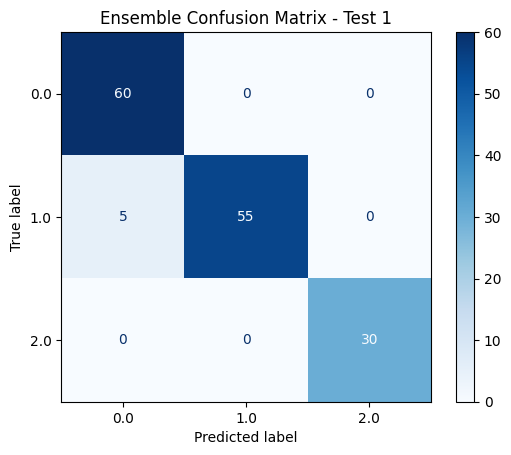


Teste 2: Pacientes de teste = (np.int64(2), np.int64(3), np.int64(5))
Ensemble Test F1: 87.96%
              precision    recall  f1-score   support

         0.0      0.741     1.000     0.851        60
         1.0      1.000     0.650     0.788        60
         2.0      1.000     1.000     1.000        30

    accuracy                          0.860       150
   macro avg      0.914     0.883     0.880       150
weighted avg      0.896     0.860     0.856       150



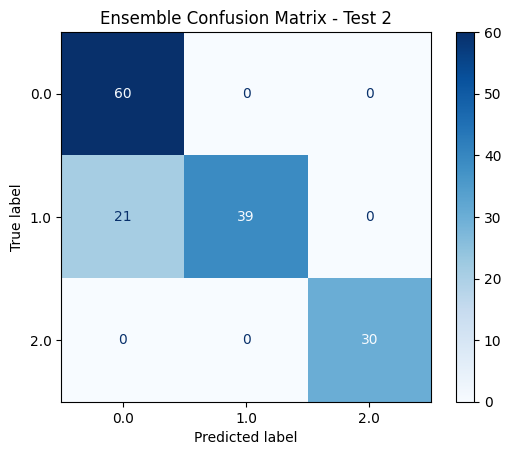


Teste 3: Pacientes de teste = (np.int64(2), np.int64(3), np.int64(6))
Ensemble Test F1: 89.44%
              precision    recall  f1-score   support

         0.0      0.860     0.817     0.838        60
         1.0      0.825     0.867     0.846        60
         2.0      1.000     1.000     1.000        30

    accuracy                          0.873       150
   macro avg      0.895     0.894     0.894       150
weighted avg      0.874     0.873     0.873       150



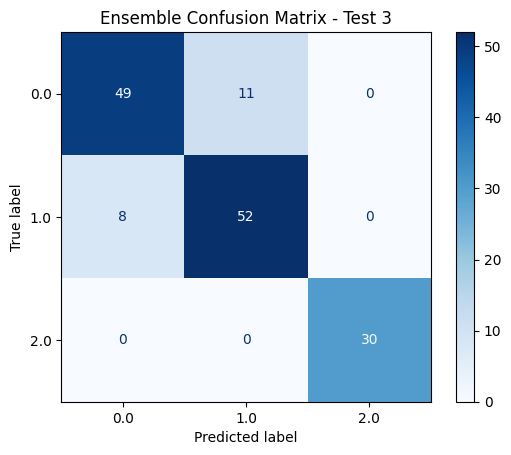


Teste 4: Pacientes de teste = (np.int64(2), np.int64(3), np.int64(7))
Ensemble Test F1: 93.29%
              precision    recall  f1-score   support

         0.0      0.843     0.983     0.908        60
         1.0      0.980     0.817     0.891        60
         2.0      1.000     1.000     1.000        30

    accuracy                          0.920       150
   macro avg      0.941     0.933     0.933       150
weighted avg      0.929     0.920     0.919       150



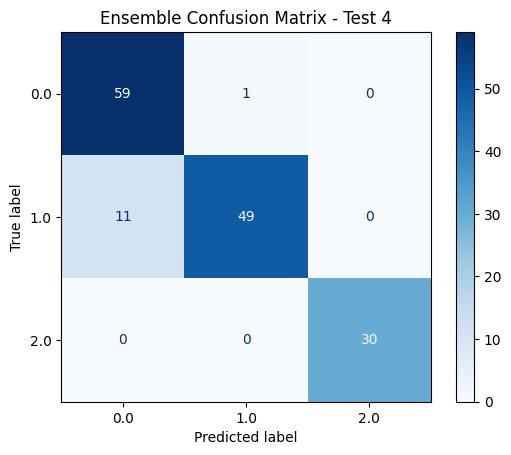


Teste 5: Pacientes de teste = (np.int64(2), np.int64(3), np.int64(9))
Ensemble Test F1: 87.61%
              precision    recall  f1-score   support

         0.0      0.757     0.933     0.836        60
         1.0      0.913     0.700     0.792        60
         2.0      1.000     1.000     1.000        30

    accuracy                          0.853       150
   macro avg      0.890     0.878     0.876       150
weighted avg      0.868     0.853     0.851       150



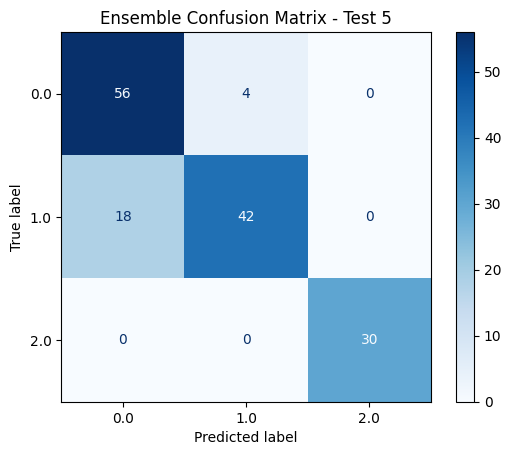


Teste 6: Pacientes de teste = (np.int64(2), np.int64(3), np.int64(10))
Ensemble Test F1: 88.69%
              precision    recall  f1-score   support

         0.0      0.763     0.967     0.853        60
         1.0      0.955     0.700     0.808        60
         2.0      1.000     1.000     1.000        30

    accuracy                          0.867       150
   macro avg      0.906     0.889     0.887       150
weighted avg      0.887     0.867     0.864       150



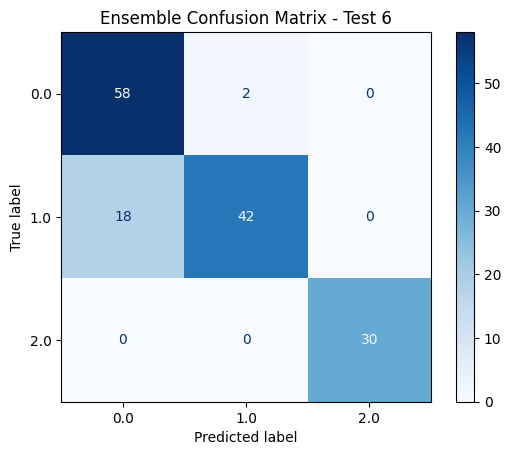


Teste 7: Pacientes de teste = (np.int64(2), np.int64(3), np.int64(11))


/home/pedro/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:788: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Ensemble Test F1: 94.44%
              precision    recall  f1-score   support

         0.0      0.931     0.900     0.915        60
         1.0      0.903     0.933     0.918        60
         2.0      1.000     1.000     1.000        30

    accuracy                          0.933       150
   macro avg      0.945     0.944     0.944       150
weighted avg      0.934     0.933     0.933       150



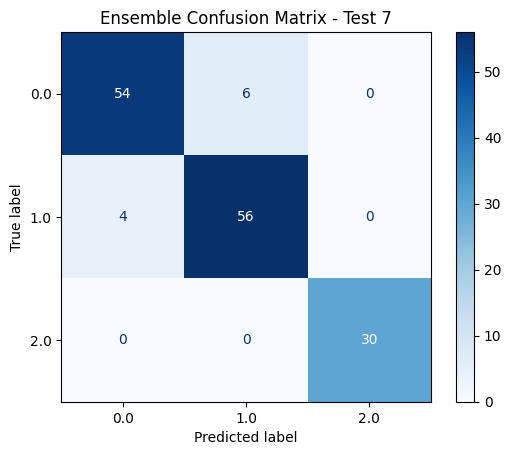


Teste 8: Pacientes de teste = (np.int64(2), np.int64(3), np.int64(12))
Ensemble Test F1: 88.69%
              precision    recall  f1-score   support

         0.0      0.955     0.700     0.808        60
         1.0      0.763     0.967     0.853        60
         2.0      1.000     1.000     1.000        30

    accuracy                          0.867       150
   macro avg      0.906     0.889     0.887       150
weighted avg      0.887     0.867     0.864       150



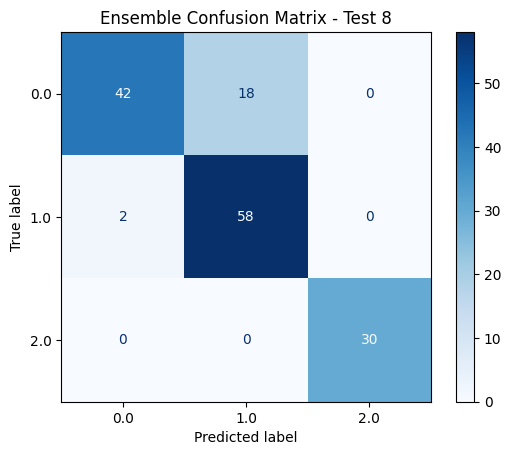


Teste 9: Pacientes de teste = (np.int64(2), np.int64(3), np.int64(13))
Ensemble Test F1: 97.78%
              precision    recall  f1-score   support

         0.0      0.938     1.000     0.968        60
         1.0      1.000     0.933     0.966        60
         2.0      1.000     1.000     1.000        30

    accuracy                          0.973       150
   macro avg      0.979     0.978     0.978       150
weighted avg      0.975     0.973     0.973       150



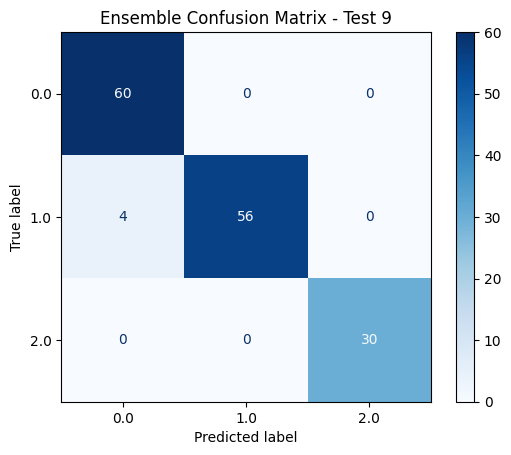


Teste 10: Pacientes de teste = (np.int64(2), np.int64(3), np.int64(14))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

def plot_skeletons_mean_std(samples, labels, connections, colors, head_indices,
                            figsize=(15,5), alpha_std=0.2, joint_size=40, lw_seg=2,
                            cols=3):
    
    n = len(samples)
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1] * rows / cols))
    axes = np.array(axes).reshape(-1)  # flatten em 1D para indexar facilmente

    for ax in axes:
        ax.axis('off')  # desliga todos, depois ligamos só os usados

    for ax, sample, label in zip(axes, samples, labels):
        mean_coords = sample[:66]
        std_coords = sample[66:]

        x = mean_coords[0::2]
        y = mean_coords[1::2]
        x_std = std_coords[0::2]
        y_std = std_coords[1::2]

        # Círculo da cabeça
        head_x = x[head_indices]
        head_y = -y[head_indices]
        center_x, center_y = head_x.mean(), head_y.mean()
        radius = np.max(np.sqrt((head_x - center_x)**2 + (head_y - center_y)**2)) * 1.15

        # Fundo suave
        ax.set_facecolor('#f9f9f9')

        # --- Desenhar segmentos ---
        for part, segs in connections.items():
            for a, b in segs:
                ax.plot([x[a], x[b]], [-y[a], -y[b]],
                        c=colors.get(part,'#1f77b4'),
                        lw=lw_seg, alpha=0.8)

        # --- Juntas (mean) ---
        ax.scatter(x, -y, c='black', s=joint_size, zorder=3, edgecolors='white', linewidth=0.5)

        # --- Elipses de incerteza (std) ---
        for i in range(len(x)):
            ellipse = patches.Ellipse(
                (x[i], -y[i]),
                width=x_std[i]*2,
                height=y_std[i]*2,
                edgecolor='red',
                facecolor='red',
                alpha=alpha_std,
                lw=1
            )
            ax.add_patch(ellipse)

        # --- Círculo da cabeça ---
        circle = patches.Circle(
            (center_x, center_y),
            radius,
            fill=False,
            linestyle='dotted',
            edgecolor='gray',
            lw=2
        )
        ax.add_patch(circle)

        # --- Ajustes finais ---
        ax.set_title(f"{label}", fontsize=14, fontweight='bold')
        ax.axis('equal')
        ax.axis('on')

    plt.tight_layout()
    plt.show()


# Escolher o paciente que quer visualizar
patient_id =11

# Obter os índices das amostras pertencentes a esse paciente
indices = np.where(patient_ids == patient_id)[0]

# Plotar os esqueletos de todas as amostras desse paciente
plot_skeletons_mean_std(
    samples=[X_train[i] for i in indices],
    labels=[Y_train[i] for i in indices],
    connections=connections,
    colors=colors,
    head_indices=head_indices,
    figsize=(10,10),
    alpha_std=0.15,
    joint_size=50,
    lw_seg=3
)

